In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [20]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train[0].shape

(28, 28)

In [23]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [24]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

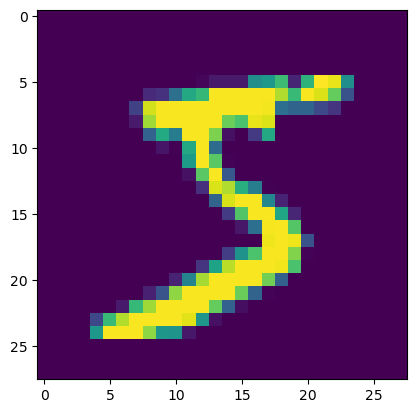

In [25]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [26]:
X_train=X_train/255
X_test=X_test/255

In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [48]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.1375 - val_accuracy: 0.9748
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.1340 - val_accuracy: 0.9754
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.1485 - val_accuracy: 0.9736
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.1422 - val_accuracy: 0.9750
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.1474 - val_accuracy: 0.9756
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.1569 - val_accuracy: 0.9723
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0056 - accuracy: 0.9979 - val_loss: 0.1499 - val_accuracy:

In [49]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [50]:
y_pred=y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.978

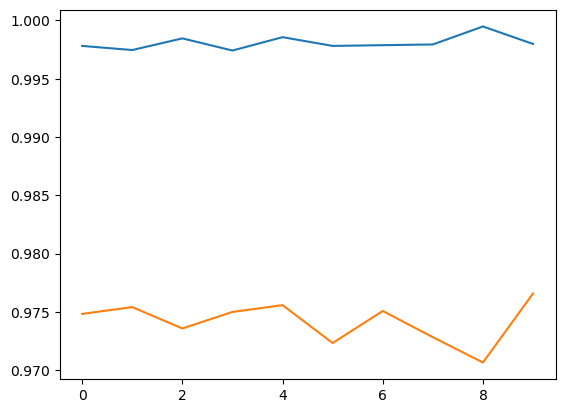

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

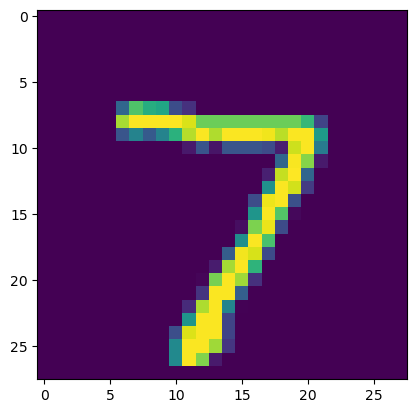

In [56]:
plt.imshow(X_test[0])

In [58]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 77ms/step


array([7], dtype=int64)